In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, root_mean_squared_error
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("Populations.csv")
columns = ["Region, subregion, country or area *", "Year", "Type", "Total Population, as of 1 January (thousands)", "Total Population, as of 1 July (thousands)", "Male Population, as of 1 July (thousands)", "Female Population, as of 1 July (thousands)", "Median Age, as of 1 July (years)", "Population Change (thousands)", "Births (thousands)","Total Fertility Rate (live births per woman)", "Population Density, as of 1 July (persons per square km)", "Parent code", "Under-Five Mortality (deaths under age 5 per 1,000 live births)","Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)","Net Number of Migrants (thousands)","Live Births Surviving to Age 1 (thousands)","Life Expectancy at Age 80, both sexes (years)","Total Deaths (thousands)","Life Expectancy at Birth, both sexes (years)","Sex Ratio at Birth (males per 100 female births)","Net Reproduction Rate (surviving daughters per woman)","Rate of Natural Change (per 1,000 population)","Population Growth Rate (percentage)","Births by women aged 15 to 19 (thousands)","Crude Birth Rate (births per 1,000 population)"]

data = data[columns]
heatmap_data = data
world_data = data[ data["Type"] == "World"]
region_data = data[data["Type"] == "SDG region"]
data = data[data["Type"] == "Country/Area"]

data = data.dropna()

C:\Users\elike\AppData\Local\Temp\ipykernel_7192\3940803515.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Populations.csv")


In [91]:
# numerical_columns = [
#     "Year", "Total Population, as of 1 January (thousands)", 
#     "Total Population, as of 1 July (thousands)", "Male Population, as of 1 July (thousands)", 
#     "Female Population, as of 1 July (thousands)", "Median Age, as of 1 July (years)", 
#     "Population Change (thousands)", "Births (thousands)", 
#     "Total Fertility Rate (live births per woman)", 
#     "Population Density, as of 1 July (persons per square km)", 
#     "Under-Five Mortality (deaths under age 5 per 1,000 live births)", 
#     "Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)", 
#     "Net Number of Migrants (thousands)", 
#     "Live Births Surviving to Age 1 (thousands)", 
#     "Life Expectancy at Age 80, both sexes (years)", 
#     "Total Deaths (thousands)", 
#     "Life Expectancy at Birth, both sexes (years)", 
#     "Sex Ratio at Birth (males per 100 female births)", 
#     "Net Reproduction Rate (surviving daughters per woman)", 
#     "Rate of Natural Change (per 1,000 population)", 
#     "Population Growth Rate (percentage)", 
#     "Births by women aged 15 to 19 (thousands)", 
#     "Crude Birth Rate (births per 1,000 population)"
# ]

# numerical_data = data[numerical_columns]

# # Standardize the numerical data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(numerical_data)

# # Apply t-SNE
# tsne = TSNE(n_components=2, random_state=42, perplexity=30)
# tsne_results = tsne.fit_transform(numerical_data)

# # Visualize the results
# plt.figure(figsize=(10, 6))
# plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.7)
# plt.title("t-SNE Visualization of Population Data")
# plt.xlabel("t-SNE Component 1")
# plt.ylabel("t-SNE Component 2")
# plt.show()

In [ ]:
depths = [10,25, 50, 100, 200, 500]
n_estimators = [10, 50, 100, 200, 500]
max_features = ["sqrt", "log2", None]
criteria = ['squared_error', "friedman_mse", "poisson"]
y = data["Total Population, as of 1 January (thousands)"]
X = data.drop(["Region, subregion, country or area *", "Type","Total Population, as of 1 January (thousands)", "Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)", "Female Population, as of 1 July (thousands)"], axis=1)

# Standardize the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=476)
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X, y, test_size=0.125, random_state=476)

best_score = float('inf')
best_params = None


for depth in depths:
    for estimators in n_estimators:
        for features in max_features:
            for criterion in criteria: 
                clf = RandomForestRegressor(criterion=criterion, n_estimators=estimators, max_features=features, n_jobs=-1, max_depth=depth)
                clf.fit(X_subtrain, y_subtrain)
                y_predict = clf.predict(X_val)
                score = root_mean_squared_error(y_val, y_predict)
                print(depth, estimators, features,criterion, score)
                # Update the best score and parameters if the current score is better
                if score < best_score:
                    best_score = score
                    best_params = (depth, estimators, features, criteria)

# Output the best result
print("Best parameters:", best_params)
print("Best RMSE:", best_score)

10 10 sqrt squared_error 6804.801857051314
10 10 sqrt friedman_mse 7373.087139737013
10 10 sqrt poisson 3015.164615206915
10 10 log2 squared_error 2744.5202895853295
10 10 log2 friedman_mse 6994.704488902962
10 10 log2 poisson 5754.657453955558
10 10 None squared_error 7290.873602101556
10 10 None friedman_mse 5811.493271188987
10 10 None poisson 5760.891017750315
10 50 sqrt squared_error 3611.127125675141
10 50 sqrt friedman_mse 4220.647082533522
10 50 sqrt poisson 3943.4846632625254
10 50 log2 squared_error 4101.362526428008
10 50 log2 friedman_mse 3131.19109179624
10 50 log2 poisson 3505.8060575552763
10 50 None squared_error 5526.017359760222
10 50 None friedman_mse 5175.7790161095545
10 50 None poisson 5047.3137284302575
10 100 sqrt squared_error 4277.256634364434
10 100 sqrt friedman_mse 3837.3021330414845
10 100 sqrt poisson 4449.445945188049
10 100 log2 squared_error 3869.617641958315
10 100 log2 friedman_mse 4012.021332180678
10 100 log2 poisson 4144.790643245319
10 100 None s

RMSE: 1612.4983309102834


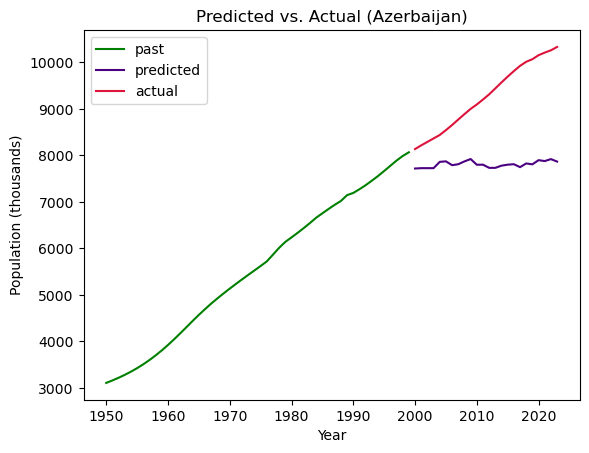

In [35]:
place = 'Azerbaijan'
year = 2000

data = data[data['Region, subregion, country or area *'] == place]

train = data[data['Year'] < year]
test = data[data['Year'] >= year]

X_train = train.drop(["Region, subregion, country or area *", "Type",
               "Total Population, as of 1 January (thousands)",
               "Total Population, as of 1 July (thousands)",
               "Male Population, as of 1 July (thousands)",
               "Female Population, as of 1 July (thousands)"], axis=1)

X_test = test.drop(["Region, subregion, country or area *", "Type",
               "Total Population, as of 1 January (thousands)",
               "Total Population, as of 1 July (thousands)",
               "Male Population, as of 1 July (thousands)",
               "Female Population, as of 1 July (thousands)"], axis=1)

y_train = train['Total Population, as of 1 January (thousands)']
y_test = test['Total Population, as of 1 January (thousands)']


clf = RandomForestRegressor(criterion='squared_error', n_estimators=10, max_features='log2', n_jobs=-1, max_depth=25)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
score = root_mean_squared_error(y_test, y_predict)

print(f'RMSE: {score}')

plt.plot(range(1950, 2000), y_train, color='green', label='past')
plt.plot(range(2000, 2024), y_predict, color='indigo', label='predicted')
plt.plot(range(2000, 2024), y_test, color='crimson', label='actual')
plt.title(f'Predicted vs. Actual ({place})')
plt.xlabel('Year')
plt.ylabel('Population (thousands)')
plt.legend()
plt.show()